In [1]:


import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fsefsef/jatin_normal_xray.jpg
/kaggle/input/test-image/download.jpg
/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/

In [2]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset="/kaggle/input/covid-19-x-ray-10000-images/dataset/"

In [4]:
os.listdir(dataset)


['normal', 'covid']

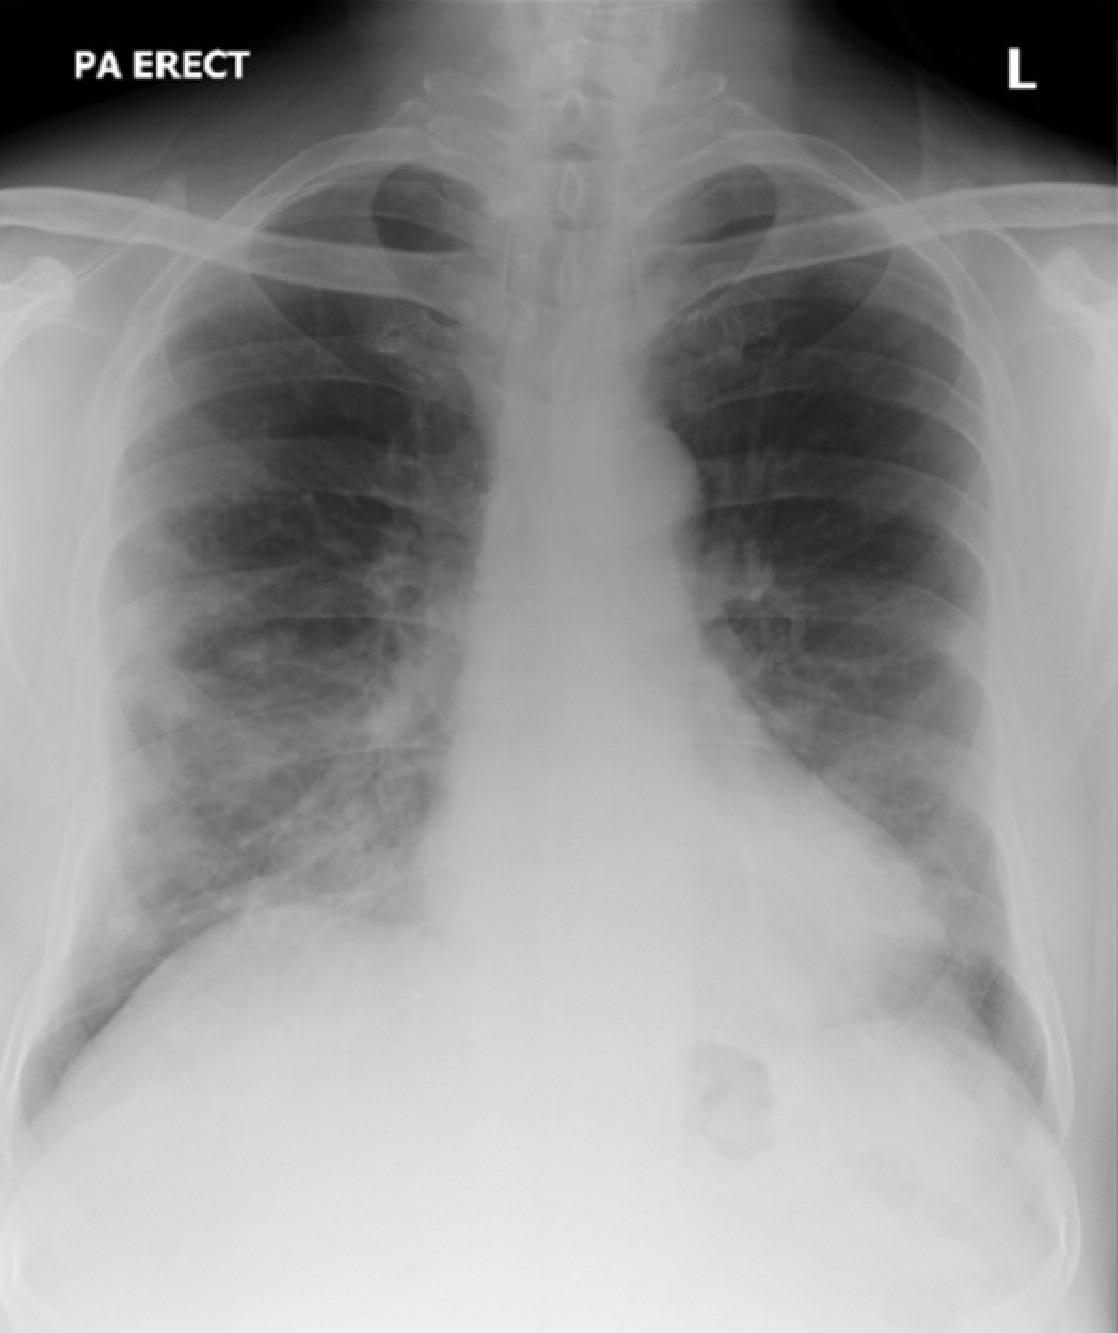

In [5]:
from PIL import Image 

im = Image.open(r"/kaggle/input/covid-19-x-ray-10000-images/dataset/covid/covid (20).jpeg")  
  
im


In [6]:
im.size

(1118, 1333)

In [7]:
np.array(im)

array([[[  0,   0,   0],
        [  3,   3,   3],
        [  7,   7,   7],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  4,   4,   4],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [156, 156, 156],
        [142, 142, 142],
        [143, 143, 143]],

       [[219, 219, 219],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [157, 157, 157],
        [142, 142, 142],
        [144, 144, 144]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [157, 157, 157],
        [142, 142, 142],
        [144, 144, 144]]

In [8]:
IMG_W = 150
IMG_H = 150
CHANNELS = 1

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 50
BATCH_SIZE = 8

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.5],
    validation_split=0.3,
    )

train_generator = train_datagen.flow_from_directory(
    dataset,
                                                        color_mode = "grayscale",

    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset, 
                                                        color_mode = "grayscale",

    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')


Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE ,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = 50)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
8/8 [==============================] - 9s 695ms/step - loss: 1.3256 - accuracy: 0.7380 - val_loss: 0.6165 - val_accuracy: 0.8750
Epoch 2/50
8/8 [==============================] - 3s 357ms/step - loss: 0.6516 - accuracy: 0.6754 - val_loss: 0.3856 - val_accuracy: 0.8750
Epoch 3/50
8/8 [==============================] - 3s 361ms/step - loss: 0.6114 - accuracy: 0.7324 - val_loss: 0.4619 - val_accuracy: 0.8750
Epoch 4/50
8/8 [==============================] - 3s 389ms/step - loss: 0.6260 - accuracy: 0.7108 - val_loss: 0.5639 - val_accuracy: 0.8750
Epoch 5/50
8/8 [==============================] - 3s 364ms/step - loss: 0.6184 - accuracy: 0.7192 - val_loss: 0.6001 - val_accuracy: 0.8750
Epoch 6/50
8/8 [==============================] - 3s 362ms/step - loss: 0.6493 - accuracy: 0.5905 - val_loss: 0.5502 - val_accuracy: 0.8750
Epoch 7/50
8/8 [==============================] - 3s 347ms/step - loss: 0.6265 - accuracy: 0.7350 - val_loss: 0.5595 - val_accuracy: 0.8750
Epoch 8/50
8/8 [====

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [14]:
model.save('corona5.h5')


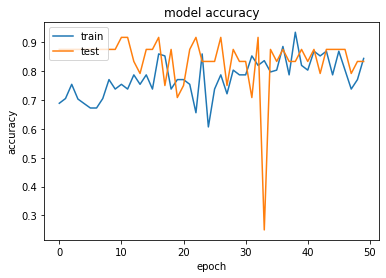

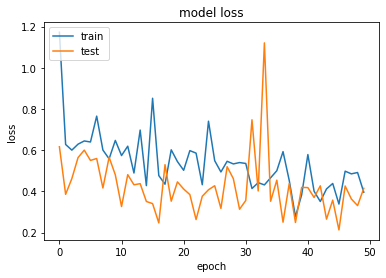

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.84375
validation_accuracy 0.8333333134651184


In [17]:
label = validation_generator.classes


In [18]:
validation_generator

In [19]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


In [21]:
labels2

{0: 'covid', 1: 'normal'}

In [22]:
pred[0]

array([0.05285182], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[21,  8],
       [ 0,  0]])

In [24]:
from keras.models import load_model

model= load_model('corona2.h5')


OSError: SavedModel file does not exist at: corona2.h5/{saved_model.pbtxt|saved_model.pb}

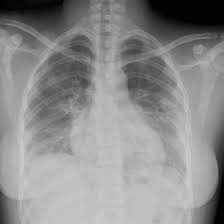

In [25]:
im = Image.open(r"../input/test-image/download.jpg")  
  
im

In [26]:
img = load_img("../input/test-image/download.jpg", grayscale=True, target_size=(150, 150,1))
img = img_to_array(img)
img= img.reshape(1, 150, 150, 1)
img = img.astype('float32')
img = img / 255.0
img

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[[[0.00784314],
         [0.01176471],
         [0.01176471],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01176471]],

        [[0.00784314],
         [0.01176471],
         [0.01176471],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01176471]],

        [[0.00784314],
         [0.01176471],
         [0.01176471],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01176471]],

        ...,

        [[0.18431373],
         [0.21960784],
         [0.2509804 ],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],

        [[0.18039216],
         [0.21568628],
         [0.24313726],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],

        [[0.17254902],
         [0.20784314],
         [0.23921569],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]]]], dtype=float32)

In [27]:
pred=model.predict(img)
predicted_class_indices=np.argmax(pred,axis=1)


In [28]:
labels2[predicted_class_indices[0]]

'covid'